# Data exploration

Lien du dataset : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
original_df = pd.read_csv('data/data.csv')

In [3]:
original_df.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [4]:
original_df.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

#### Correlations

<AxesSubplot:>

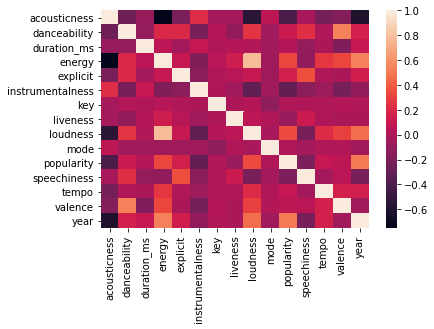

In [6]:
import seaborn as sns

corrMatrix = original_df.corr()
sns.heatmap(corrMatrix)

#### Correlation between popularity and year

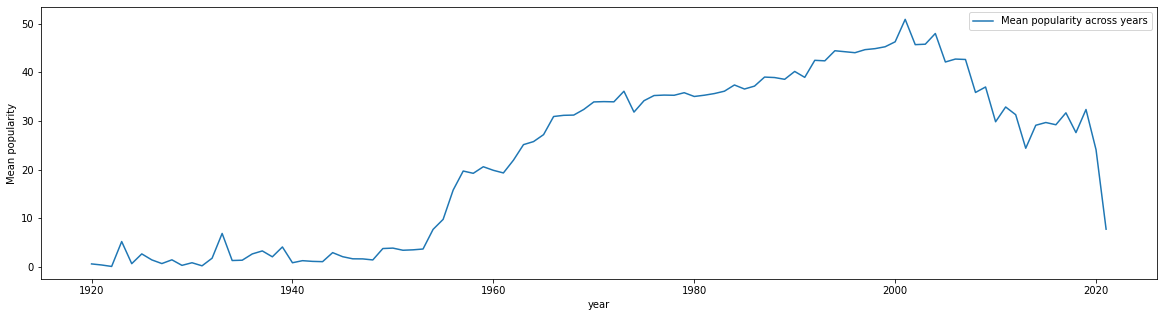

In [7]:
plt.figure(figsize=(20,5))
original_df.groupby('year')['popularity'].mean().plot(label='Mean popularity across years')
plt.ylabel('Mean popularity')
plt.legend()
plt.show()

# Data preprocessing

In [8]:
df = original_df.drop(columns=['artists', 'id', 'name', 'release_date'])

dummies = pd.get_dummies(df['key'])

for j in dummies.columns:
    df['key' + str(j)] = dummies[j]
    
df = df.drop(columns=['key', 'year'])

In [9]:
df.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness       liveness       loudness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       0.211123     -11.750865   
std         0.251978          0.334574       0.180493       5.691591   
min         0.000000          0.000000       0.000000     -60.000000   
25%         0.000000          0.000000       0.099200     -14.908000   
50%         0.000000          0.000524       0.138000     -10.836000   
75%         0.000000          0.252000       0.270000      -7.499000   
max         1.000000          1.000000       1.000000       3.855000   

                mode     popularity    speechiness          tempo  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean        0.702384      25.693381       0.105729     117.006500   
std         0.457211      21.872740       0.182260      30.254178   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.035200      93.931000   
50%         1.000000      25.000000       0.045500     115.816000   
75%         1.000000      42.000000       0.076300     135.011000   
max         1.000000     100.000000       0.971000     243.507000   

             valence           key0           key1           key2  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean        0.524533       0.125966       0.077769       0.108470   
std         0.264477       0.331811       0.267808       0.310974   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.311000       0.000000       0.000000       0.000000   
50%         0.536000       0.000000       0.000000       0.000000   
75%         0.743000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                key3           key4          key5           key6  \
count  174389.000000  174389.000000  174389.00000  174389.000000   
mean        0.041746       0.076421       0.09488       0.052905   
std         0.200008       0.265671       0.29305       0.223844   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.00000       0.000000   
50%         0.000000       0.000000       0.00000       0.000000   
75%         0.000000       0.000000       0.00000       0.000000   
max         1.000000       1.000000       1.00000       1.000000   

                key7           key8           key9          key10  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean        0.122502       0.061202       0.103843       0.071140   
std         0.327866       0.239702       0.305057       0.257059   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

               key11  
count  174389.000000  
mean        0.063158  
std         0.243247  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [10]:
y = df['popularity'].to_numpy()
X = df.drop(columns=['popularity'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Printing

In [13]:
def n_first_pred_vs_real(y_pred, y_test, n_first):
    sns.lineplot(data=y_pred[:n_first], label='pred')
    sns.lineplot(data=y_test[:n_first], label='test')
    plt.title(str(n_first) + ' first prediction in opposition to real values')
    plt.xlabel('samples')
    plt.ylabel('popularity')
    plt.legend()
    plt.show()
    
def n_first_pred_diff_real(y_pred, y_test, n_first):
    diff = np.abs(y_pred[:n_first] - y_test[:n_first])
    sns.lineplot(data=diff, label='error')
    plt.title('Absolute difference between ' + str(n_first) + ' first real and predict values')
    plt.xlabel('samples')
    plt.ylabel('popularity')
    plt.legend()
    plt.show()

# Models

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139511, 24), (34878, 24), (139511,), (34878,))

In [15]:
def eval_model_perf(model):
    y_pred = model.predict(X_test)

    test_rmse = mean_squared_error(y_test, y_pred)**(1/2)
    train_rmse = mean_squared_error(y_train, model.predict(X_train))**(1/2)

    print("train_rmse", train_rmse, "test_rmse", test_rmse, 'overfitting', test_rmse - train_rmse)

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lp = make_pipeline(MinMaxScaler(), lr)
lp.fit(X_train, y_train)

-cross_val_score(lp, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error')

array([18.363583  , 18.45405675, 18.3937899 , 18.52382688])

In [17]:
eval_model_perf(lp)

train_rmse 18.42988398063976 test_rmse 18.459750886814117 overfitting 0.02986690617435528


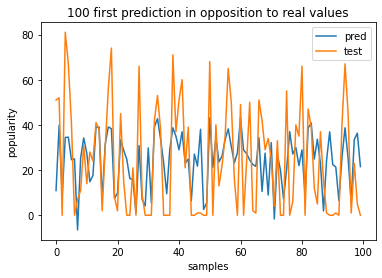

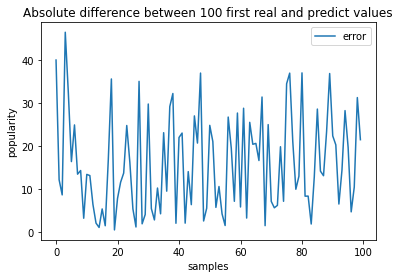

In [18]:
y_pred = lp.predict(X_test)
n_first_pred_vs_real(y_pred, y_test, 100)
n_first_pred_diff_real(y_pred, y_test, 100)

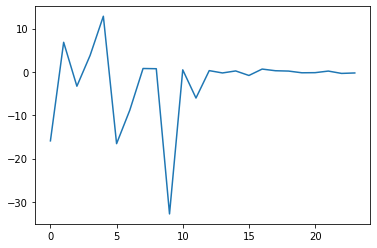

In [19]:
plt.plot(lp.named_steps['linearregression'].coef_)

In [20]:
X.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'key0', 'key1', 'key2', 'key3', 'key4', 'key5',
       'key6', 'key7', 'key8', 'key9', 'key10', 'key11'],
      dtype='object')

## SGD

In [21]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgdp = make_pipeline(MinMaxScaler(), sgd)
sgdp.fit(X_train, y_train)

-cross_val_score(sgdp, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error')

array([18.36769199, 18.45540979, 18.39927976, 18.53846922])

In [22]:
eval_model_perf(sgdp)

train_rmse 18.430610317209872 test_rmse 18.459805204372266 overfitting 0.029194887162393712


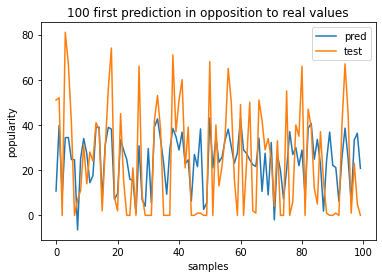

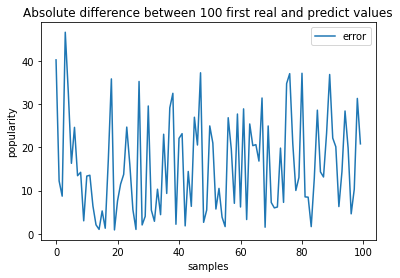

In [23]:
y_pred = sgdp.predict(X_test)
n_first_pred_vs_real(y_pred, y_test, 100)
n_first_pred_diff_real(y_pred, y_test, 100)

### Alpha hyper-parameter tuning 

In [24]:
alpha_list = []

train_rmse_list = []
test_rmse_list = []

cv_rmse_list = []

for alpha in [10**x for x in range(-5,3,1)]: 
    print('alpha =', alpha)
    
    sgdp = make_pipeline(MinMaxScaler(), SGDRegressor(alpha=alpha))
    %time sgdp.fit(X_train, y_train)
    
    alpha_list.append(alpha)
    test_rmse_list.append(mean_squared_error(y_test, sgdp.predict(X_test))**(1/2))
    train_rmse_list.append(mean_squared_error(y_train, sgdp.predict(X_train))**(1/2))
    cv_rmse_list.append(np.std(-cross_val_score(sgdp, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error')))

alpha = 1e-05
CPU times: user 773 ms, sys: 17.3 ms, total: 790 ms
Wall time: 789 ms
alpha = 0.0001
CPU times: user 1.19 s, sys: 121 ms, total: 1.31 s
Wall time: 768 ms
alpha = 0.001
CPU times: user 1.28 s, sys: 102 ms, total: 1.38 s
Wall time: 821 ms
alpha = 0.01
CPU times: user 892 ms, sys: 116 ms, total: 1.01 s
Wall time: 462 ms
alpha = 0.1
CPU times: user 729 ms, sys: 108 ms, total: 837 ms
Wall time: 284 ms
alpha = 1
CPU times: user 773 ms, sys: 116 ms, total: 888 ms
Wall time: 341 ms
alpha = 10
CPU times: user 937 ms, sys: 108 ms, total: 1.05 s
Wall time: 492 ms
alpha = 100
CPU times: user 897 ms, sys: 110 ms, total: 1.01 s
Wall time: 455 ms


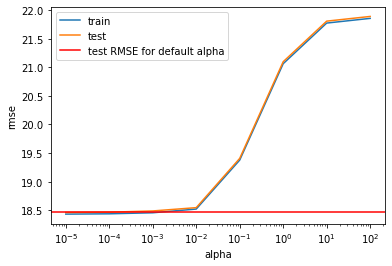

In [25]:
plt.semilogx(alpha_list, train_rmse_list, label='train')
plt.semilogx(alpha_list, test_rmse_list, label='test')
plt.axhline(y=18.46, color='r', linestyle='-', label='test RMSE for default alpha')
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.legend()
plt.show()

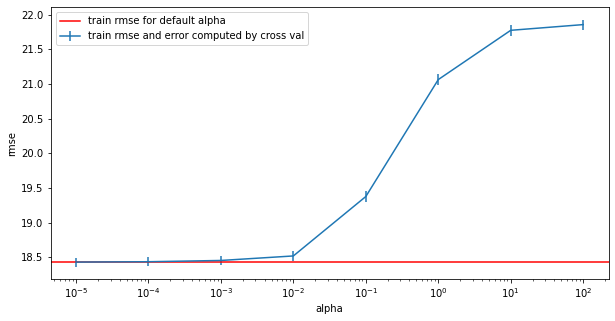

In [26]:
plt.figure(figsize=(10,5))
plt.gca().set_xscale("log", nonpositive='clip')
plt.errorbar(alpha_list, train_rmse_list, yerr=cv_rmse_list, label='train rmse and error computed by cross val')
plt.axhline(y=18.43, color='r', linestyle='-', label='train rmse for default alpha')
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.legend()
plt.show()

## Random Tree Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

parameters_list = []
all_train_rmse_list = []
all_test_rmse_list = []

for estimators in [50, 75, 100]:
    depth_list = []
    train_rmse_list = []
    test_rmse_list = []
    
    for depth in range(2,11): 
        print('n_estimators =', estimators, 'max_depth =', depth)

        rfrp = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=42))
        %time rfrp.fit(X_train, y_train)

        depth_list.append(depth)
        test_rmse_list.append(mean_squared_error(y_test, rfrp.predict(X_test))**(1/2))
        train_rmse_list.append(mean_squared_error(y_train, rfrp.predict(X_train))**(1/2))
    
    parameters_list.append(depth_list)
    all_train_rmse_list.append(train_rmse_list)
    all_test_rmse_list.append(test_rmse_list)

n_estimators = 50 max_depth = 2
CPU times: user 6.77 s, sys: 48.7 ms, total: 6.82 s
Wall time: 6.86 s
n_estimators = 50 max_depth = 3
CPU times: user 10 s, sys: 39.1 ms, total: 10 s
Wall time: 10.1 s
n_estimators = 50 max_depth = 4
CPU times: user 13.4 s, sys: 39.3 ms, total: 13.4 s
Wall time: 13.4 s
n_estimators = 50 max_depth = 5
CPU times: user 17.5 s, sys: 123 ms, total: 17.6 s
Wall time: 17.9 s
n_estimators = 50 max_depth = 6
CPU times: user 20.1 s, sys: 85.5 ms, total: 20.2 s
Wall time: 20.3 s
n_estimators = 50 max_depth = 7
CPU times: user 23.4 s, sys: 88.7 ms, total: 23.5 s
Wall time: 23.6 s
n_estimators = 50 max_depth = 8
CPU times: user 26.6 s, sys: 108 ms, total: 26.7 s
Wall time: 26.9 s
n_estimators = 50 max_depth = 9
CPU times: user 29.8 s, sys: 121 ms, total: 29.9 s
Wall time: 30.1 s
n_estimators = 50 max_depth = 10
CPU times: user 34.4 s, sys: 240 ms, total: 34.6 s
Wall time: 35.1 s
n_estimators = 75 max_depth = 2
CPU times: user 10.5 s, sys: 87.5 ms, total: 10.6 s
Wall 

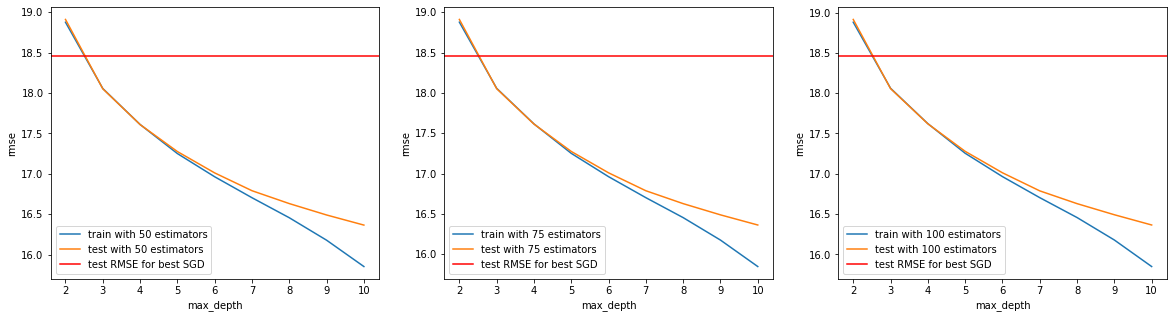

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.plot(parameters_list[0], all_train_rmse_list[0], label='train with 50 estimators')
ax1.plot(parameters_list[0], all_test_rmse_list[0], label='test with 50 estimators')
ax1.axhline(y=18.46, color='r', linestyle='-', label='test RMSE for best SGD')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('rmse')
ax1.legend()

ax2.plot(parameters_list[1], all_train_rmse_list[1], label='train with 75 estimators')
ax2.plot(parameters_list[1], all_test_rmse_list[1], label='test with 75 estimators')
ax2.axhline(y=18.46, color='r', linestyle='-', label='test RMSE for best SGD')
ax2.set_xlabel('max_depth')
ax2.set_ylabel('rmse')
ax2.legend()

ax3.plot(parameters_list[2], all_train_rmse_list[2], label='train with 100 estimators')
ax3.plot(parameters_list[2], all_test_rmse_list[2], label='test with 100 estimators')
ax3.axhline(y=18.46, color='r', linestyle='-', label='test RMSE for best SGD')
ax3.set_xlabel('max_depth')
ax3.set_ylabel('rmse')
ax3.legend()

plt.show()

## XGBoost with max_depth tuned - Pas dans le rapport, juste pour tester

In [29]:
import xgboost as xgb

depth_list = []

train_rmse_list = []
test_rmse_list = []

for depth in range(2,10): 
    print('max_depth =', depth)
    
    xgbp = make_pipeline(MinMaxScaler(), xgb.XGBRegressor(max_depth=depth))
    %time xgbp.fit(X_train, y_train)
    
    depth_list.append(depth)
    test_rmse_list.append(mean_squared_error(y_test, xgbp.predict(X_test))**(1/2))
    train_rmse_list.append(mean_squared_error(y_train, xgbp.predict(X_train))**(1/2))

max_depth = 2
CPU times: user 17.8 s, sys: 140 ms, total: 18 s
Wall time: 2.41 s
max_depth = 3
CPU times: user 27.7 s, sys: 162 ms, total: 27.8 s
Wall time: 3.59 s
max_depth = 4
CPU times: user 39 s, sys: 268 ms, total: 39.3 s
Wall time: 5.16 s
max_depth = 5
CPU times: user 48.9 s, sys: 480 ms, total: 49.4 s
Wall time: 6.76 s
max_depth = 6
CPU times: user 59.6 s, sys: 558 ms, total: 1min
Wall time: 8.18 s
max_depth = 7
CPU times: user 1min 12s, sys: 871 ms, total: 1min 13s
Wall time: 10.2 s
max_depth = 8
CPU times: user 1min 23s, sys: 532 ms, total: 1min 23s
Wall time: 11 s
max_depth = 9
CPU times: user 1min 35s, sys: 870 ms, total: 1min 36s
Wall time: 13 s


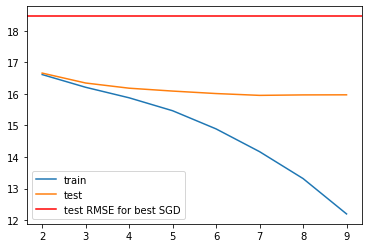

In [30]:
plt.plot(depth_list, train_rmse_list, label='train')
plt.plot(depth_list, test_rmse_list, label='test')
plt.axhline(y=18.46, color='r', linestyle='-', label='test RMSE for best SGD')
plt.legend()
plt.show()

In [34]:
#xgb.to_graphviz(xgbp.named_steps['xgbregressor'])